In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

In [3]:
df = pd.read_csv("kyphosis.csv")

In [4]:
df.shape

(81, 4)

In [11]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


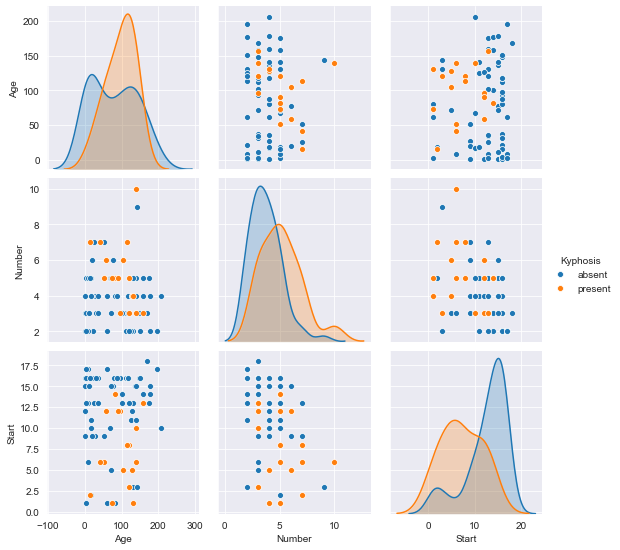

In [8]:
sns.pairplot(df, hue="Kyphosis")

In [23]:
from sklearn.model_selection import train_test_split

X= df.drop("Kyphosis", axis=1)
y= df["Kyphosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier()

In [26]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
predictions = dtree.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[16  3]
 [ 4  2]]
              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



## Try with Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier(n_estimators = 200)

In [32]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rfc_pred = rfc.predict(X_test)

In [35]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[18  1]
 [ 3  3]]
              precision    recall  f1-score   support

      absent       0.86      0.95      0.90        19
     present       0.75      0.50      0.60         6

    accuracy                           0.84        25
   macro avg       0.80      0.72      0.75        25
weighted avg       0.83      0.84      0.83        25



In [36]:
# We indeed get better results with Random Forest than with decision tree

In [37]:
df["Kyphosis"].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64